In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
file_dir = '/mnt/data/hernandom/Microscopy_Data/Histology_of_tail_lesions/FromLaura/summary_df_all_cohorts_040619.csv'

In [82]:
df = pd.read_csv(file_dir, index_col=0)

In [83]:
df['mouse id'].unique()

array(['PV01', 'PV02', 'PV03', 'PV04', 'PV05', 'PV06', 'PV08', 'SF04',
       'SF06', 'SF07', 'SF08', 'SF09'], dtype=object)

In [84]:
df

,slice id,left background sub,right background sub,mouse id,ctx background sub,average intensity,experimental_group,striatum intensity background sub,average ctx sub,average striatum
0,anterior,2822.0,2927.0,PV01,218.0,6.811538,OHDA_3,2874.5,12.185780,13.185780
1,anterior,2802.0,3341.0,PV01,231.0,7.048387,OHDA_3,3071.5,12.296537,13.296537
2,anterior,2968.0,2916.0,PV01,238.0,6.611247,OHDA_3,2942.0,11.361345,12.361345
3,tail,575.0,556.0,PV01,201.0,0.979839,OHDA_3,565.5,1.813433,2.813433
4,anterior,2411.0,2529.0,PV01,217.0,5.747449,OHDA_3,2470.0,10.382488,11.382488
...,...,...,...,...,...,...,...,...,...,...
110,anterior,3468.0,3278.0,SF09,213.0,8.207792,OHDA_3,3373.0,14.835681,15.835681
111,tail,516.0,388.0,SF09,197.0,0.687332,OHDA_3,452.0,1.294416,2.294416
112,anterior,724.0,1021.0,SF09,235.0,1.562500,OHDA_3,872.5,2.712766,3.712766
113,tail,241.0,244.0,SF09,244.0,-0.003597,OHDA_3,242.5,-0.006148,0.993852


In [67]:
mice_to_keep = ['C01', 'C02', 'C03', 'PV01', 'PV02', 'PV03', 'PV04',
                'PV05', 'PV06', 'PV08', 'SF04', 'SF06', 'SF07', 'SF09']

In [68]:
df = df[df['mouse id'].isin(mice_to_keep)]

In [69]:
df.experimental_group.unique()

array(['OHDA_3', 'control_3'], dtype=object)

In [70]:
df

,slice id,left background sub,right background sub,mouse id,ctx background sub,average intensity,experimental_group,striatum intensity background sub,average ctx sub,average striatum
0,anterior,2822.0,2927.0,PV01,218.0,6.811538,OHDA_3,2874.5,12.185780,13.185780
1,anterior,2802.0,3341.0,PV01,231.0,7.048387,OHDA_3,3071.5,12.296537,13.296537
2,anterior,2968.0,2916.0,PV01,238.0,6.611247,OHDA_3,2942.0,11.361345,12.361345
3,tail,575.0,556.0,PV01,201.0,0.979839,OHDA_3,565.5,1.813433,2.813433
4,anterior,2411.0,2529.0,PV01,217.0,5.747449,OHDA_3,2470.0,10.382488,11.382488
...,...,...,...,...,...,...,...,...,...,...
110,anterior,3468.0,3278.0,SF09,213.0,8.207792,OHDA_3,3373.0,14.835681,15.835681
111,tail,516.0,388.0,SF09,197.0,0.687332,OHDA_3,452.0,1.294416,2.294416
112,anterior,724.0,1021.0,SF09,235.0,1.562500,OHDA_3,872.5,2.712766,3.712766
113,tail,241.0,244.0,SF09,244.0,-0.003597,OHDA_3,242.5,-0.006148,0.993852


In [74]:
df['average striatum'] - df['striatum intensity background sub'] / df['ctx background sub']

0      0.000000e+00
1     -1.776357e-15
2      0.000000e+00
3      4.440892e-16
4     -1.776357e-15
           ...     
110   -1.776357e-15
111    0.000000e+00
112    0.000000e+00
113    0.000000e+00
114    0.000000e+00
Length: 106, dtype: float64

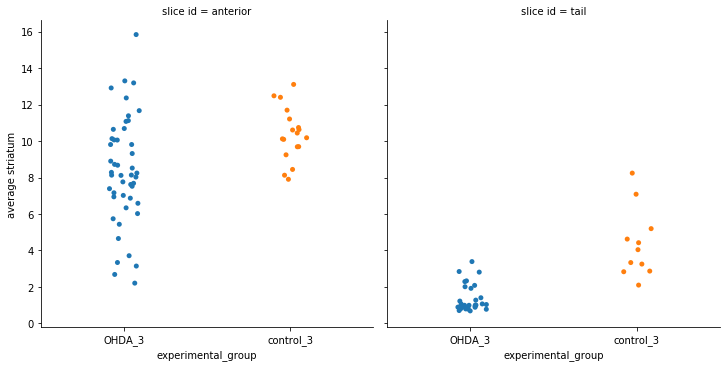

In [71]:
sns.catplot(data=df, col='slice id', y='average striatum',
            x='experimental_group')

In [72]:
# normalized version
cont_ant_avg = np.mean(df[np.logical_and(df.experimental_group == 'control_3',
                                         df['slice id'] == 'anterior')]['average striatum'])

cont_tail_avg = np.mean(df[np.logical_and(df.experimental_group == 'control_3',
                                         df['slice id'] == 'tail')]['average striatum'])

In [51]:
for i in df.index:
    if df.loc[i, 'slice id'] == 'anterior':
        df.loc[i, 'normalized_average_intensity'] = df.loc[i, 'average striatum'] / cont_ant_avg
    if df.loc[i, 'slice id'] == 'tail':
        df.loc[i, 'normalized_average_intensity'] = df.loc[i, 'average striatum'] / cont_tail_avg 

/home/hernandom/.conda/envs/behav/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


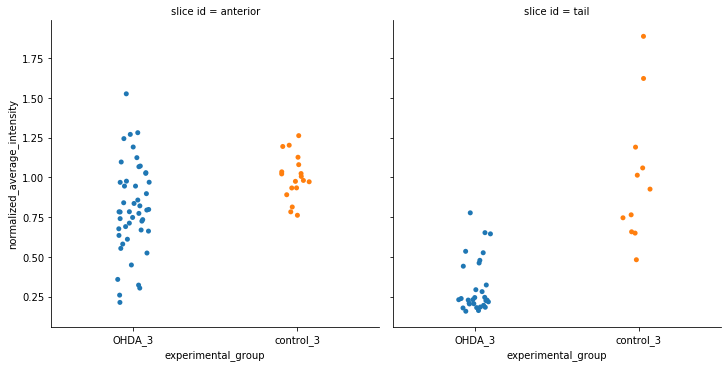

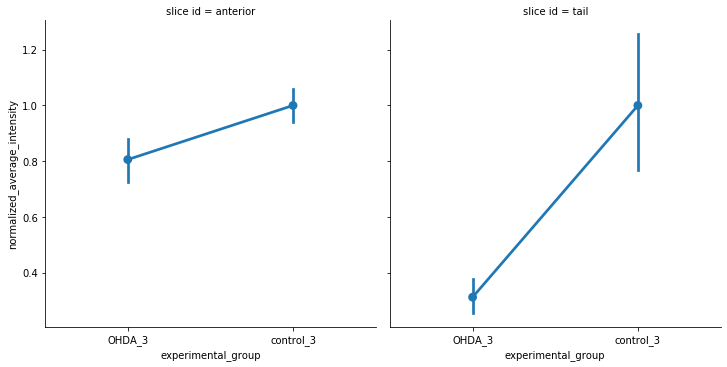

In [52]:
sns.catplot(data=df, col='slice id', y='normalized_average_intensity',
            x='experimental_group')
sns.catplot(data=df, col='slice id', y='normalized_average_intensity',
            x='experimental_group', kind='point')

In [53]:
df[np.logical_and(df.experimental_group == 'control_3',
                                         df['slice id'] == 'tail')]['average intensity']

61    1.442953
62    0.712154
64    1.203093
67    2.156863
68    1.817330
72    3.672297
75    2.535469
81    1.987310
84    4.163391
85    0.966090
88    1.320482
Name: average intensity, dtype: float64

In [77]:
df.loc[62]

slice id                                  tail
left background sub                        732
right background sub                       542
mouse id                                  SF04
ctx background sub                         303
average intensity                     0.712154
experimental_group                   control_3
striatum intensity background sub          637
average ctx sub                        1.10231
average striatum                       2.10231
Name: 62, dtype: object

In [78]:
df.loc[72]

slice id                                  tail
left background sub                       1630
right background sub                      2167
mouse id                                  SF04
ctx background sub                         268
average intensity                       3.6723
experimental_group                   control_3
striatum intensity background sub       1898.5
average ctx sub                        6.08396
average striatum                       7.08396
Name: 72, dtype: object

In [80]:
df[np.logical_and(df['mouse id']=='SF06', df['slice id']=='tail')]

,slice id,left background sub,right background sub,mouse id,ctx background sub,average intensity,experimental_group,striatum intensity background sub,average ctx sub,average striatum
81,tail,984.0,1014.0,SF06,216.0,1.987310,control_3,999.00,3.625000,4.625000
84,tail,2019.0,1838.0,SF06,234.0,4.163391,control_3,1928.50,7.241453,8.241453
85,tail,534.0,588.5,SF06,198.0,0.966090,control_3,561.25,1.834596,2.834596
88,tail,751.0,831.0,SF06,243.0,1.320482,control_3,791.00,2.255144,3.255144
